# Comparison of Pure TensorFlow, Keras and TF Learn

In this notebook we are going to present the same problem being solved in three different ways. In all the cases, TensorFlow is going to be used as backend. The main difference is that two high levels API are going to be evaluated and compared each other and also with the original TensorFlow implementation. The problem to be solved is the classic MNIST. First we are goig to implement in TensorFlow, next in Keras and finally in TFLearn. In the end, a summary of the pros and cons of each is discussed. 

## Input Data

In [1]:
import numpy as np

X_train = np.random.random(10)
print(X_train)

[0.61580491 0.06352208 0.58176963 0.74916022 0.65452592 0.66816314
 0.00246508 0.73491984 0.53312708 0.66194073]


In [0]:
w = 5
b = 1
y_train = w*X_train + b


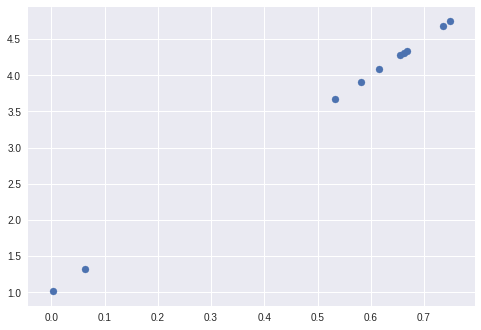

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)

In [0]:
X_train = np.c_[X_train]
y_train = np.c_[y_train]

## Implementation in TensorFlow

In [0]:
import tensorflow as tf

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
#n_hidden_1 = 128 # 1st layer number of neurons
#n_hidden_2 = 512 # 2nd layer number of neurons
num_input = 1 # MNIST data input (img shape: 28*28)
num_output = 1 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
y = tf.placeholder("float", [None, num_output])

# Store layers weight & bias
weights = {
    'out': tf.Variable(tf.random_normal([num_input, num_output]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_output]))
}

# Create model
def neural_net(x):
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(x, weights['out']) + biases['out']
    return out_layer

In [0]:
# Construct model
model = neural_net(X)

# Define loss and optimizer
#output = neural_net_model(xs,3)
#cost = tf.reduce_mean(tf.square(output-ys))
#train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)



#loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#    logits=logits, labels=Y))

loss_op = tf.reduce_mean(tf.square(model-y))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)

In [0]:
# Evaluate model (with test logits, for dropout to be disabled)
#correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = X_train, y_train#mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        
        #print(sess.run(model, feed_dict={X: X_train}))
        print(sess.run(loss_op, feed_dict={X: batch_x, y: batch_y}))
        
    print("Optimization Finished!")
    
    y_pred = sess.run(model, feed_dict={X: X_train})
    w_pred = sess.run(weights)
    sess.run(biases)

6.5640426
3.8791053
2.397009
1.5765889
1.1201993
0.86413157
0.7183428
0.6333068
0.5817822
0.5487839
0.52606803
0.50909865
0.4953794
0.48353523
0.47280803
0.46277943
0.45321736
0.4439926
0.43503267
0.42629576
0.41775775
0.40940338
0.40122327
0.39321035
0.38535976
0.3776669
0.37012845
0.36274073
0.35550064
0.34840512
0.3414514
0.3346365
0.32795757
0.3214119
0.314997
0.30871
0.3025486
0.29651004
0.29059213
0.28479236
0.27910826
0.27353764
0.2680782
0.26272765
0.257484
0.2523449
0.24730845
0.24237254
0.23753509
0.23279421
0.22814801
0.2235944
0.21913178
0.21475816
0.21047187
0.20627117
0.20215428
0.19811955
0.19416535
0.19029005
0.18649213
0.18277001
0.17912215
0.17554715
0.17204341
0.16860965
0.16524446
0.16194639
0.15871415
0.15554643
0.1524419
0.14939944
0.14641763
0.14349523
0.14063129
0.13782445
0.13507369
0.13237783
0.12973572
0.12714636
0.12460868
0.12212165
0.11968426
0.11729556
0.11495452
0.11266015
0.11041161
0.108207956
0.10604827
0.10393169
0.10185733
0.09982436
0.09783202
0.09

In [12]:
y_pred

array([[4.0777836],
       [1.3275205],
       [3.9082942],
       [4.7418675],
       [4.2706065],
       [4.338517 ],
       [1.0234683],
       [4.670953 ],
       [3.6660638],
       [4.307531 ]], dtype=float32)

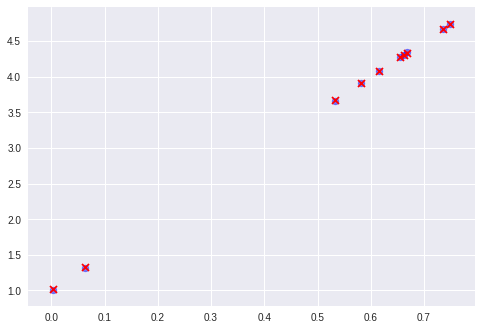

In [17]:
plt.scatter(X_train, y_train, c='b', alpha=0.5)
plt.scatter(X_train, y_pred, c='r', marker='x')

## Implementation in Keras

In [0]:
import tensorflow as tf
#mnist = tf.keras.datasets.mnist

#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1)#, activation=tf.nn.relu),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu),
  #tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
test_accuracy = model.evaluate(x_test, y_test)[1]
print("Test accuracy: {}".format(test_accuracy))

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.2158 - acc: 0.9343
Epoch 2/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.0926 - acc: 0.9711
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0641 - acc: 0.9804
Epoch 4/5
60000/60000 [==============================] - 10s 175us/step - loss: 0.0505 - acc: 0.9838
Epoch 5/5
10000/10000 [==============================] - 1s 53us/step
Test accuracy: 0.9764


## Implementation in TFLearn

In [0]:
!pip install tflearn

import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

X_train, y_train, X_test, y_test = mnist.load_data(one_hot=True)

net = tflearn.input_data([None, 784])
net = tflearn.fully_connected(net, 128, activation='ReLU')
net = tflearn.fully_connected(net, 512, activation='ReLU')
net = tflearn.fully_connected(net, 10, activation='softmax')
net = tflearn.regression(net,
                         optimizer='sgd',
                         learning_rate=0.1,
                         loss='categorical_crossentropy')

model = tflearn.DNN(net)
model.fit(X_train, y_train,
          validation_set=0.1, show_metric=True, batch_size=100, n_epoch=5)

test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_accuracy)

Training Step: 2474  | total loss: 0.11723 | time: 4.569s
| SGD | epoch: 005 | loss: 0.11723 - acc: 0.9696 -- iter: 49400/49500
Training Step: 2475  | total loss: 0.11746 | time: 5.596s
| SGD | epoch: 005 | loss: 0.11746 - acc: 0.9697 | val_loss: 0.15667 - val_acc: 0.9551 -- iter: 49500/49500
--
Test accuracy:  [0.9601]


## Textual Quiz

### Setup code
Please execute the following line of code so that your answer in the quizes can be checked:

In [0]:
from base64 import b64encode, b64decode

encoded_answer = {}
encoded_answer[1] = b'eydhJzogJycsICdiJzogJyd9'

def check_answer(students_answer, question, see_correct_answer=False):
  if see_correct_answer:
    expected_answer = b64decode(encoded_answer[question]).decode('utf-8')
    print("The expected answer is {}".format(expected_answer))
  else:
    if b64encode(str(students_answer).lower().strip().encode('utf-8')) == encoded_answer[question]:
      print('You got it right!')
    else:
      print("Please try again!")

In [0]:
def encode_answer(a):
  print(b64encode(str(a).lower().strip().encode('utf-8')))


### Question 1) Please fill the gaps in the following definitions:
- Each iteration from a neural network is called 'a'
- A sample drawn from a dataset for each iteration in a neural network is called 'b'

Please answer to what 'a' and 'b' stands for below (example: `{'a': 'neural network', 'b':'True'}`:


In [0]:
# TODO: Please answer Question 1 below )
reply = {'a':'', 'b':''}

# Check if your answer is correct. Change see_correct_answer to 'True' to see expected answer 
check_answer(reply, question=1, see_correct_answer=False)

You got it right!


In [0]:
encode_answer(str({'a':'', 'b':''}))

b'eydhJzogJycsICdiJzogJyd9'


### 2. When are the weights updated?
Whenever you train the network using batch means that you have chosen to train using batch gradient descent. There are three variants for gradient descent algorithm:

Gradient Descent
Stochastic Gradient Descent
Batch Gradient Descent
The first one passes the whole data through the network and finds the error rate for all of them and finds the gradients with respect to all the data samples and updates the weights after passing the whole data-set. That means for each epoch, passing the whole data-set through the network, one update occurs. This update is accurate toward descending gradient.

The second one, updates the weights after passing each data which means if your data sample has one thousand samples, one thousand updates will happen whilst the previous method updates the weights one time per the whole data-sample. This method is not accurate but is so much faster than the previous one.

The last one tries to find a trade-off between the above approaches. You specify a batch size and you will update the weights after passing the data samples in each batch, means the gradients are calculated after passing each batch. Suppose you have one thousand data sample and you have specified a batch size with one hundred data sample. You will have 10 weight update for each epoch. This method is more accurate than the second approach and is more faster than the first approach.

Do I back propagate after each batch has been presented to network or after each image?

Your method is the last one. Consequently, after passing the entire batch, you would update the weights.

In [0]:
# TODO: Please answer Question 2 below
reply = {'a': '', 'b':''}

# Change see_correct_answer to 'True' to see expected answer 
check_answer(reply, question=2, see_correct_answer=False)

In [0]:
b64encode(str(answer_1).encode('utf-8')) 

b'eydhJzogJycsICdiJzogJyd9'

In [0]:
from base64 import b64encode, b64decode

In [0]:
b64decode(b'ZmVybmFuZG8ud2l0dG1hbm5AZ21haWwuY29t')

b'fernando.wittmann@gmail.com'

In [0]:
b64encode(b'fernando.wittmann@gmail.com')

b'ZmVybmFuZG8ud2l0dG1hbm5AZ21haWwuY29t'